# Analyse `question2` (loudness) by `season` and `country` similar to the momentary tinnitus analysis

In [2]:
# project location
p_loc = 'C:/Users/joa24jm/Documents/tinnitus-country/'

# add src to path so the noteboook can import utilities.py
import sys
sys.path.append('C:\\Users\\joa24jm\\Documents\\tinnitus-country\\src\\')

In [3]:
# imports
import pandas as pd
from d00_utils import utilities as u
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, ks_2samp
from scipy.stats import chi2_contingency, f_oneway

In [4]:
df = pd.read_csv(p_loc + '/data/02_intermediate/merged_users.csv', index_col = 'Unnamed: 0',
                parse_dates = ['4', '9', 'fup_answer_from', 'bl_answer_from'],na_values = ['??.??.????', '27.02.2522']
                )

In [5]:
df.rename(columns = {'question1':'Tinnitus_right_now', 'question4': 'mood', 'question5': 'arousal',
                     'question6': 'stress', 'question7': 'concentration', 'question2':'loudness'}, inplace = True)
df.Tinnitus_right_now.replace({0.0: 'No', 1.0: 'Yes'}, inplace = True)

# invert seasons for countries from the southern hemisphere
df['is_northern'] = df.country.apply(u.is_country_northern)
# create a column that indicates in which season of the year this answer is from
df['fup_season'] = df.apply(lambda x: u.get_season(x.fup_answer_from, x.is_northern), axis=1)

C:\Users\joa24jm\Documents\tinnitus-country\src\d00_utils\utilities.py:207: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  if start <= d <= end)


In [6]:
# loudness distribution in general
df.loudness.describe()

count    95389.000000
mean         0.474356
std          0.304045
min          0.000000
25%          0.220000
50%          0.440000
75%          0.720000
max          1.000000
Name: loudness, dtype: float64

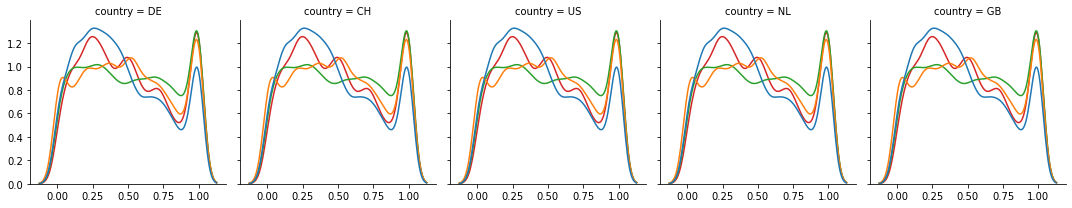

In [29]:
countries = ['CH', 'DE', 'GB', 'NL', 'US']

sub_df = df[df.country.isin(countries)]
g = sns.FacetGrid(sub_df,  col="country")
g.map(sns.kdeplot, data = sub_df, x = 'loudness', hue = 'fup_season', common_norm = False)

(0.0, 1.0)

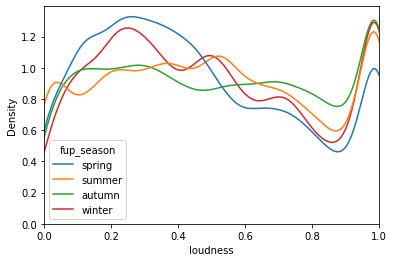

In [28]:
ax = sns.kdeplot(data = sub_df, x = 'loudness', hue = 'fup_season', common_norm = False)
ax.set_xlim(xmin = 0, xmax = 1)

(0.0, 1.0)

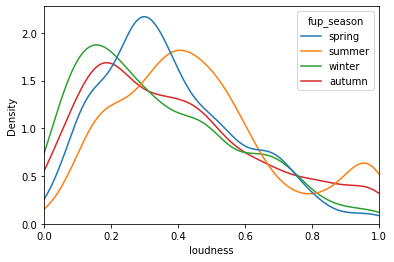

In [30]:
ax = sns.kdeplot(data = df[df.country == 'CH'], x = 'loudness', hue = 'fup_season', common_norm = False)
ax.set_xlim(xmin = 0, xmax = 1)

(0.0, 1.0)

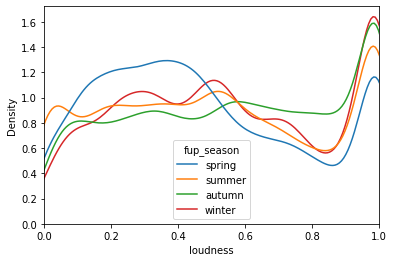

In [31]:
ax = sns.kdeplot(data = df[df.country == 'DE'], x = 'loudness', hue = 'fup_season', common_norm = False)
ax.set_xlim(xmin = 0, xmax = 1)


### Achtung Label des unteren Subplots sind inkonsistent!

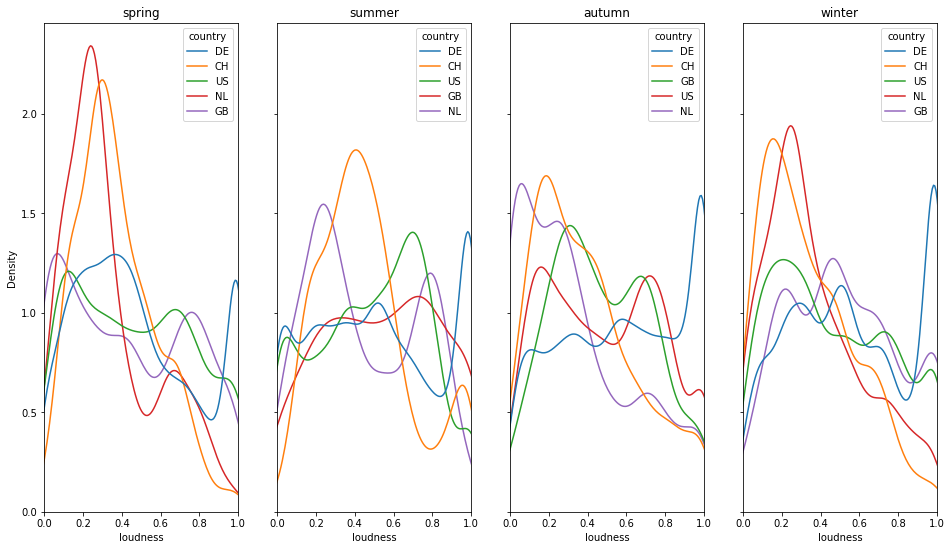

In [43]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, sharey = True)
fig.set_size_inches(16, 9)
for ax, season in zip(fig.axes, ['spring', 'summer', 'autumn', 'winter']):
    sns.kdeplot(data = sub_df[sub_df.fup_season == season], x = 'loudness', hue = 'country',
                common_norm = False, ax = ax)
    ax.set_xlim(xmin = 0, xmax = 1)
    ax.set_title(season)


